In [1]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_1020332/867265004.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
emission = pd.read_csv('lists/emissao.csv')
detectors = pd.read_csv('lists/detectors_G4.csv')

emissionv = []
detectorsv = []

for index,row in emission.iterrows():
    xe = row [ 'x']
    ye = row [ 'y']
    ze = row [ 'z']
    emissionv.append([xe,ye,ze])
    
for index,row in detectors.iterrows():
    xd = row [ 'x']
    yd = row [ 'y']
    zd = row [ 'z']
    detectorsv.append([xd,yd,zd])

In [3]:
detected = []
distances = []
for index,row in emission.iterrows():
    count = 0
    xd = row [ 'x']
    yd = row [ 'y']
    zd = row [ 'z']
    with open ( 'macros/photonsgps.batch' , 'r') as batch:
        lines = batch.readlines()
    lines[13] = f"/gps/pos/centre { xd } { yd } { zd } cm \n"
    with open ( 'macros/photonsgps.batch' , 'w') as modified_batch:
        modified_batch.writelines(lines)
    command = f"./diffusion macros/photonsgps.batch >/dev/null"
    os.system (command)
    if (os.path.isfile('output.dat')):
        with open(r'output.dat', 'rb') as fp:
            for count, line in enumerate(fp):
                pass
        count = count + 1
        command = f'rm output.dat >/dev/null'
        os.system(command)
    else:
        count = 0
    #print('Total detected photons:', count)
    detected.append(count)
    distances.append(600-zd)

This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning message is issued up to 10 times.
This warning 

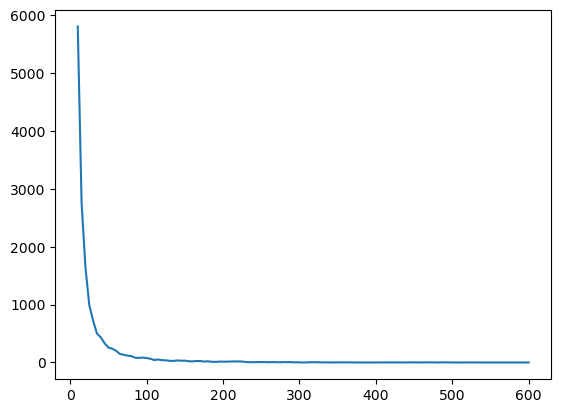

In [4]:
plt.plot(distances,detected)
plt.show()

In [ ]:
coordinates = pd.read_csv('lists/coordinates.csv') # This is a separate file created containing the X - Arapuca coordinates ( xa , za ) for running the script
xa_values = np.arange ( -12 , 13 , 1) # dimensions of the X - Arapuca cell
za_values = np.arange ( -4.8 , 5.4 , 0.6)
results = []
for index , row in coordinates . iterrows () :
    xg = row [ 'xg']
    yg = row [ 'yg']
    zg = row [ 'zg']
    for xa_index in range ( len ( xa_values ) ) :
        for za_index in range ( len ( za_values ) ) :
            xa = xa_values [ xa_index ]
            za = za_values [ za_index ]
            theta , phi = theta_phi ( xa , za , xg , yg , zg )
            with open ( '../macros/photons.batch' , 'r') as batch :
                lines = batch . readlines ()
            lines [7] = f"/gun/position { xg } { yg } { zg }\ n"
            with open ( '../macros/photons.batch' , 'w') as modified_batch :
                modified_batch.writelines(lines)
            command = f' ./ ArapucaSim -c ../data/DualCell.cfg -b ../macros/photons.batch -n 10000 -o result.dat - sT { theta } - sP { phi } ' #command that runs the ArapucaSim using the proper files
            os . system ( command )
            with open ( 'result . dat' , 'r') as result :
                b = sum ( line . count ( " B " ) for line in result )
                e = b /100

results . append ([ f'{ xg :.3f } ' ,f'{ zg :.3f }' ,f'{ xa :.3f }' ,f'{ za :.3f }' ,f'{ theta :.4f }' ,f'{ phi :.4f }' ,e ])
df = pd . DataFrame ( results , columns =[ 'xg' , 'zg' , 'xa' , 'za' , 'theta' , 'phi' , 'e' ])
df . to_csv ( 'output-arapucasim.csv' , index = False )

In [ ]:
def angle ( v1 , v2 ) : # a function to calculate the angle between two vectors
    dot = np . dot ( v1 , v2 )
    mod1 = np . linalg . norm ( v1 )
    mod2 = np . linalg . norm ( v2 )
    cos_ang = dot / mod1 / mod2
    ang = np . arccos ( cos_ang )
    ang_deg = np . degrees ( ang )
    return ang

def theta_phi ( xa , za , xg , yg , zg ) : # converting rectangular coordinates to angle values according to the scheme in Figure 13.
    RG = np . array ([ xg , yg , zg ])
    RGb = np . array ([ xg ,0 , zg ])
    RA = np . array ([ xa ,0 , za ])
    MG = RG - RA
    pink = RGb - RA
    blue = RG - RGb
    Ref = np . array ([1 ,0 ,0])
    theta_rad = angle ( MG , blue )
    theta_deg = np . degrees ( theta_rad )
    theta = theta_deg /360
    print ( " Theta ( - sT input ) : " , f'{ theta:.3f }')
    print ( " Theta ( degrees ) : " , theta_deg )
    phi_rad = angle ( Ref , pink ) + np . pi
    if zg <= 0:
        phi_rad = 2* np . pi - phi_rad
    phi_deg = np . degrees ( phi_rad )
    phi = phi_deg /180
    print ( " Phi ( - sP input ) : " , f'{ phi :.3f }')
    print ( " Phi ( degrees ) : " , phi_deg )

    return theta , phi